In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x)
#If it's already a list (or is NaN), leave it as-is.

In [3]:
#Only get Data Analyst jobs in US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NaN values from 'salary_year_avg' for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [5]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_group
#Groups the data by unique values in the job_skills column.
#Selects the salary_year_avg column for aggregation — i.e., we're only interested in analyzing salary.

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_top_pay

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
#first sorting accoring to count, then by median salary
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


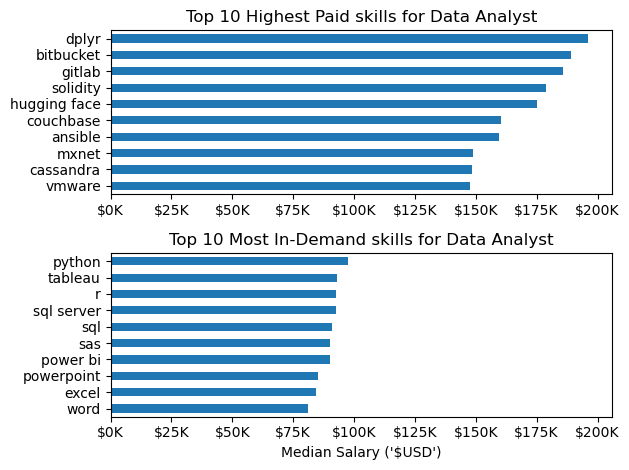

In [11]:
fig, ax = plt.subplots(2, 1)
df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)           #for plotting this graph on the 1st subplot
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid skills for Data Analyst')
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))



df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())        #sets the xlim of 2nd subplot equal to the 1st subplot
ax[1].set_title('Top 10 Most In-Demand skills for Data Analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ('$USD')")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()

Using Seaborn

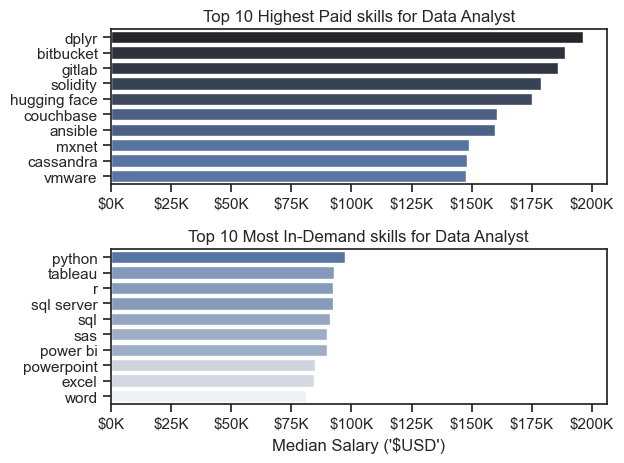

In [25]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
#df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)           #for plotting this graph on the 1st subplot
#ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid skills for Data Analyst')
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)
#df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())        #sets the xlim of 2nd subplot equal to the 1st subplot
ax[1].set_title('Top 10 Most In-Demand skills for Data Analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ('$USD')")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()

Histogram using Seaborn

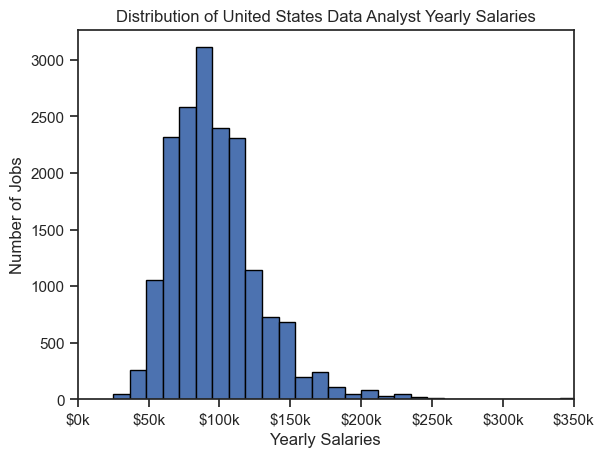

In [28]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.xlim(0, 350000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salaries')
plt.ylabel('Number of Jobs')
plt.show()

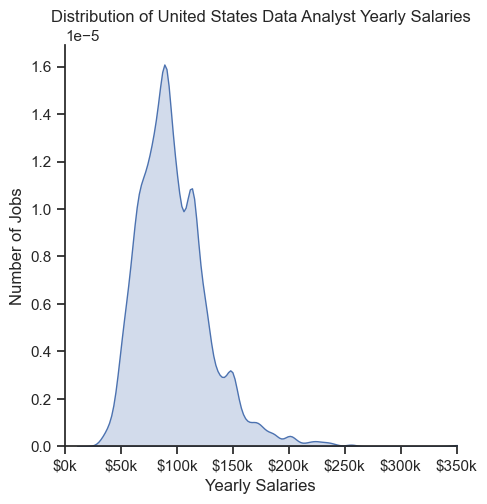

In [32]:
sns.displot(data=df_DA_US['salary_year_avg'], kind='kde', fill=True)       #kde = kernel density estimation
plt.xlim(0, 350000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salaries')
plt.ylabel('Number of Jobs')
plt.show()

Boxplots using Seaborn

C:\Users\sharb\AppData\Local\Temp\ipykernel_18576\402596413.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


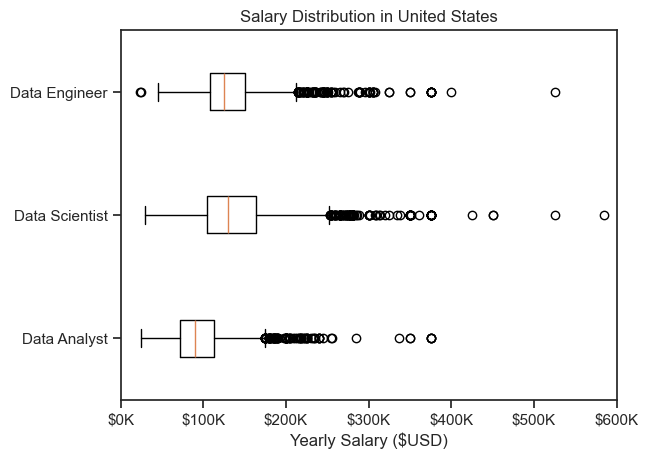

In [34]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])     #removing NaN values from 'salary_year_avg'

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
# For each job title in job_titles:
# df_US[df_US['job_title_short'] == job_title]: Filters the DataFrame to include only rows where the job title is the current job_title in the list.
# ['salary_year_avg']: Extracts the salary data for that job title.
# The resulting job_list will be a list of Series with salaries for each job title.

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in United States")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlabel("Yearly Salary ($USD)")
plt.xlim(0, 600000)
plt.show()

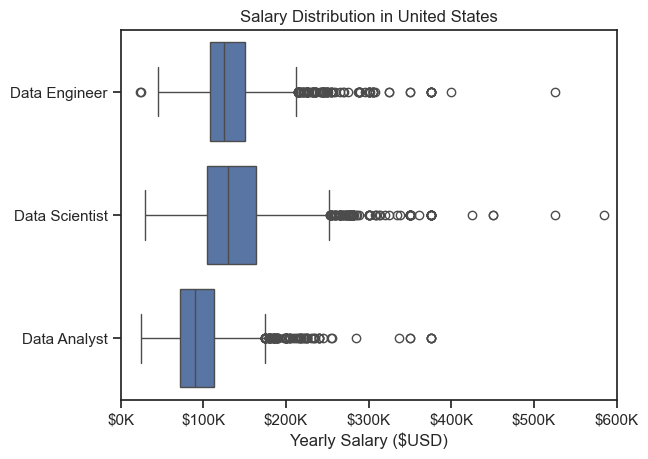

In [37]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')      
#unlike using pandas, we had to provide the data in a series manner, here using seaborn we have to provide data as data frame only defining x and y axis 

plt.title("Salary Distribution in United States")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
plt.xlim(0, 600000)
plt.show()